#  IMPORT LIBRARIES AND DATASETS

In [ ]:
# install nltk
!pip install nltk

In [ ]:
# install gensim
!pip install gensim

In [ ]:
!pip install wordcloud

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
resume_df=pd.read_csv('/content/resume.csv', encoding='latin-1')
resume_df


,resume_id,class,resume_text
0,resume_1,not_flagged,\rCustomer Service Supervisor/Tier - Isabella ...
1,resume_2,not_flagged,\rEngineer / Scientist - IBM Microelectronics ...
2,resume_3,not_flagged,\rLTS Software Engineer Computational Lithogra...
3,resume_4,not_flagged,TUTOR\rWilliston VT - Email me on Indeed: ind...
4,resume_5,flagged,\rIndependent Consultant - Self-employed\rBurl...
...,...,...,...
120,resume_121,not_flagged,\rBrattleboro VT - Email me on Indeed: indeed....
121,resume_122,not_flagged,\rResearch and Teaching Assistant - University...
122,resume_123,not_flagged,\rMedical Coder - Highly Skilled - Entry Level...
123,resume_124,flagged,\rWaterbury VT - Email me on Indeed: indeed.co...


In [ ]:
# data containing resume
resume_df=resume_df[['resume_text', 'class']]
resume_df

,resume_text,class
0,\rCustomer Service Supervisor/Tier - Isabella ...,not_flagged
1,\rEngineer / Scientist - IBM Microelectronics ...,not_flagged
2,\rLTS Software Engineer Computational Lithogra...,not_flagged
3,TUTOR\rWilliston VT - Email me on Indeed: ind...,not_flagged
4,\rIndependent Consultant - Self-employed\rBurl...,flagged
...,...,...
120,\rBrattleboro VT - Email me on Indeed: indeed....,not_flagged
121,\rResearch and Teaching Assistant - University...,not_flagged
122,\rMedical Coder - Highly Skilled - Entry Level...,not_flagged
123,\rWaterbury VT - Email me on Indeed: indeed.co...,flagged



# - Print the first and last elements in the dataframe. 

In [ ]:
resume_df.head(5) # To Print First Row of the Data 

,resume_text,class
0,\rCustomer Service Supervisor/Tier - Isabella ...,not_flagged
1,\rEngineer / Scientist - IBM Microelectronics ...,not_flagged
2,\rLTS Software Engineer Computational Lithogra...,not_flagged
3,TUTOR\rWilliston VT - Email me on Indeed: ind...,not_flagged
4,\rIndependent Consultant - Self-employed\rBurl...,flagged


In [ ]:
resume_df.tail(5) # To Print last Row of the data 

,resume_text,class
120,\rBrattleboro VT - Email me on Indeed: indeed....,not_flagged
121,\rResearch and Teaching Assistant - University...,not_flagged
122,\rMedical Coder - Highly Skilled - Entry Level...,not_flagged
123,\rWaterbury VT - Email me on Indeed: indeed.co...,flagged
124,\rResearch and Development Scientist - Burling...,not_flagged


# PERFORM EXPLORATORY DATA ANALYSIS

In [ ]:
# obtain dataframe information
resume_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   resume_text  125 non-null    object
 1   class        125 non-null    object
dtypes: object(2)
memory usage: 2.1+ KB


In [ ]:
# check for null values
resume_df.isnull().sum() # Check Number of Null values on columns

resume_text    0
class          0
dtype: int64

In [ ]:
resume_df['class'].value_counts()     # categorising column elements 

not_flagged    92
flagged        33
Name: class, dtype: int64

In [ ]:
resume_df['class']=resume_df['class'].apply(lambda x:1 if x=='flagged' else 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
resume_df

,resume_text,class
0,\rCustomer Service Supervisor/Tier - Isabella ...,0
1,\rEngineer / Scientist - IBM Microelectronics ...,0
2,\rLTS Software Engineer Computational Lithogra...,0
3,TUTOR\rWilliston VT - Email me on Indeed: ind...,0
4,\rIndependent Consultant - Self-employed\rBurl...,1
...,...,...
120,\rBrattleboro VT - Email me on Indeed: indeed....,0
121,\rResearch and Teaching Assistant - University...,0
122,\rMedical Coder - Highly Skilled - Entry Level...,0
123,\rWaterbury VT - Email me on Indeed: indeed.co...,1



- Divide the DataFrame into two, one that belongs to class 0 and 1. Do we have a balanced dataset?

In [ ]:
class_0_df=resume_df[resume_df['class']==0]
class_0_df

,resume_text,class
0,\rCustomer Service Supervisor/Tier - Isabella ...,0
1,\rEngineer / Scientist - IBM Microelectronics ...,0
2,\rLTS Software Engineer Computational Lithogra...,0
3,TUTOR\rWilliston VT - Email me on Indeed: ind...,0
5,\rPoultney VT - Email me on Indeed: indeed.com...,0
...,...,...
119,Professional\rNewbury VT - Email me on Indeed:...,0
120,\rBrattleboro VT - Email me on Indeed: indeed....,0
121,\rResearch and Teaching Assistant - University...,0
122,\rMedical Coder - Highly Skilled - Entry Level...,0


In [ ]:
class_1_df=resume_df[resume_df['class']==1]
class_1_df

,resume_text,class
4,\rIndependent Consultant - Self-employed\rBurl...,1
7,Statistician\rBurlington VT - Email me on Inde...,1
10,Barbara Kurth\rResearch Assistant Professor Cl...,1
15,Caroline Clauson Work Study Student\rBrattlebo...,1
17,Chelsea Martin\rEnvironmental Scientist - Vana...,1
18,Christopher Fusting Data Science Consultant\rB...,1
23,David Grass\rCity Research Scientist - Environ...,1
24,David Lucero Public Health Analyst\rBurlington...,1
27,Drew Burkhard\rEnvironmental Scientist Meets M...,1
31,Eric Anderson Data Scientist\rBrattleboro VT -...,1


PERFORM DATA CLEANING

In [ ]:
resume_df['resume_text']=resume_df['resume_text'].apply(lambda x: x.replace('\r', ''))
resume_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,resume_text,class
0,Customer Service Supervisor/Tier - Isabella Ca...,0
1,Engineer / Scientist - IBM Microelectronics Di...,0
2,LTS Software Engineer Computational Lithograph...,0
3,TUTORWilliston VT - Email me on Indeed: indee...,0
4,Independent Consultant - Self-employedBurlingt...,1
...,...,...
120,Brattleboro VT - Email me on Indeed: indeed.co...,0
121,Research and Teaching Assistant - University o...,0
122,Medical Coder - Highly Skilled - Entry LevelSu...,0
123,Waterbury VT - Email me on Indeed: indeed.com/...,1


In [ ]:
# download nltk packages
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# download nltk packages
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Get additional stopwords from nltk
from nltk.corpus import stopwords
stop_words=stopwords.words('english')
stop_words.extend(['from', 're', 'email', 'edu','com','subject'])

In [ ]:
# Remove stop words and remove words with 2 or less characters
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text) :
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 2 and token not in stop_words:
            result.append(token)
            
    return ' '.join(result)

In [ ]:
# Cleaned text
resume_df['cleaned']=resume_df['resume_text'].apply(preprocess)
resume_df

,resume_text,class,cleaned
0,Customer Service Supervisor/Tier - Isabella Ca...,0,customer service supervisor tier isabella cata...
1,Engineer / Scientist - IBM Microelectronics Di...,0,engineer scientist ibm albert gregoritsch ecaw...
2,LTS Software Engineer Computational Lithograph...,0,lts software engineer computational lithograph...
3,TUTORWilliston VT - Email me on Indeed: indee...,0,tutorwilliston alec schwartz awork college bio...
4,Independent Consultant - Self-employedBurlingt...,1,independent consultant self alex reutter fefwo...
...,...,...,...
120,Brattleboro VT - Email me on Indeed: indeed.co...,0,brattleboro bcc skilled presenter trainer micr...
121,Research and Teaching Assistant - University o...,0,research teaching assistant university cdd gra...
122,Medical Coder - Highly Skilled - Entry LevelSu...,0,medical coder highly skilled entry levelsudbur...
123,Waterbury VT - Email me on Indeed: indeed.com/...,1,waterbury bec fcwilling relocate work employer...


In [ ]:
print(resume_df['cleaned'][0])

customer service supervisor tier isabella catalog companysouth burlington aecf work service supervisor tierisabella catalog company shelburne august present customer service visual set display website maintenance supervise customer service team popular catalog company manage day day issues resolution customer upset ensure customer satisfaction troubleshoot order shipping issues lost transit order errors damages manage resolve escalated customer calls ensure customer satisfaction assist customers order placing cross selling upselling catalog merchandise set display sample merchandise catalog library customer pick area facility website clean adding images type product information assistant events coordinator office services assistanteileen fisher irvington february july support director architecture architecture coordinator daily activities including preparing monthly expense reports scheduling calendar maintenance arranging aspects travel logistics catering interior design research proj

In [ ]:
print(resume_df['resume_text'][0])

Customer Service Supervisor/Tier - Isabella Catalog CompanySouth Burlington VT - Email me on Indeed: indeed.com/r//49f8c9aecf490d26WORK EXPERIENCECustomer Service Supervisor/TierIsabella Catalog Company - Shelburne VT - August 2015 to Present2 Customer Service/Visual Set Up & Display/Website Maintenance¢ Supervise customer service team of a popular catalog company¢ Manage day to day issues and resolution of customer upset to ensure customer satisfaction¢ Troubleshoot order and shipping issues: lost in transit order errors damages¢ Manage and resolve escalated customer calls to ensure customer satisfaction¢ Assist customers with order placing cross-selling/upselling of catalog merchandise¢ Set up and display of sample merchandise in catalog library as well as customer pick-up area of the facility ¢ Website clean-up: adding images type up product information proofreadingAdministrative Assistant /Events Coordinator/Office Services AssistantEileen Fisher Inc - Irvington NY - 

#  VISUALIZE CLEANED DATASET

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


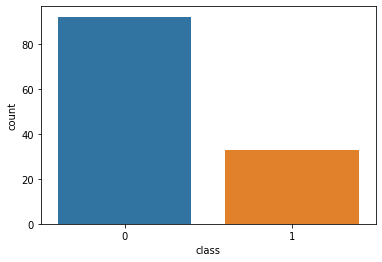

In [ ]:
# Plot the counts of flagged vs not flagged
sns.countplot(resume_df['class'], label='countplot')
#sns.countplot()

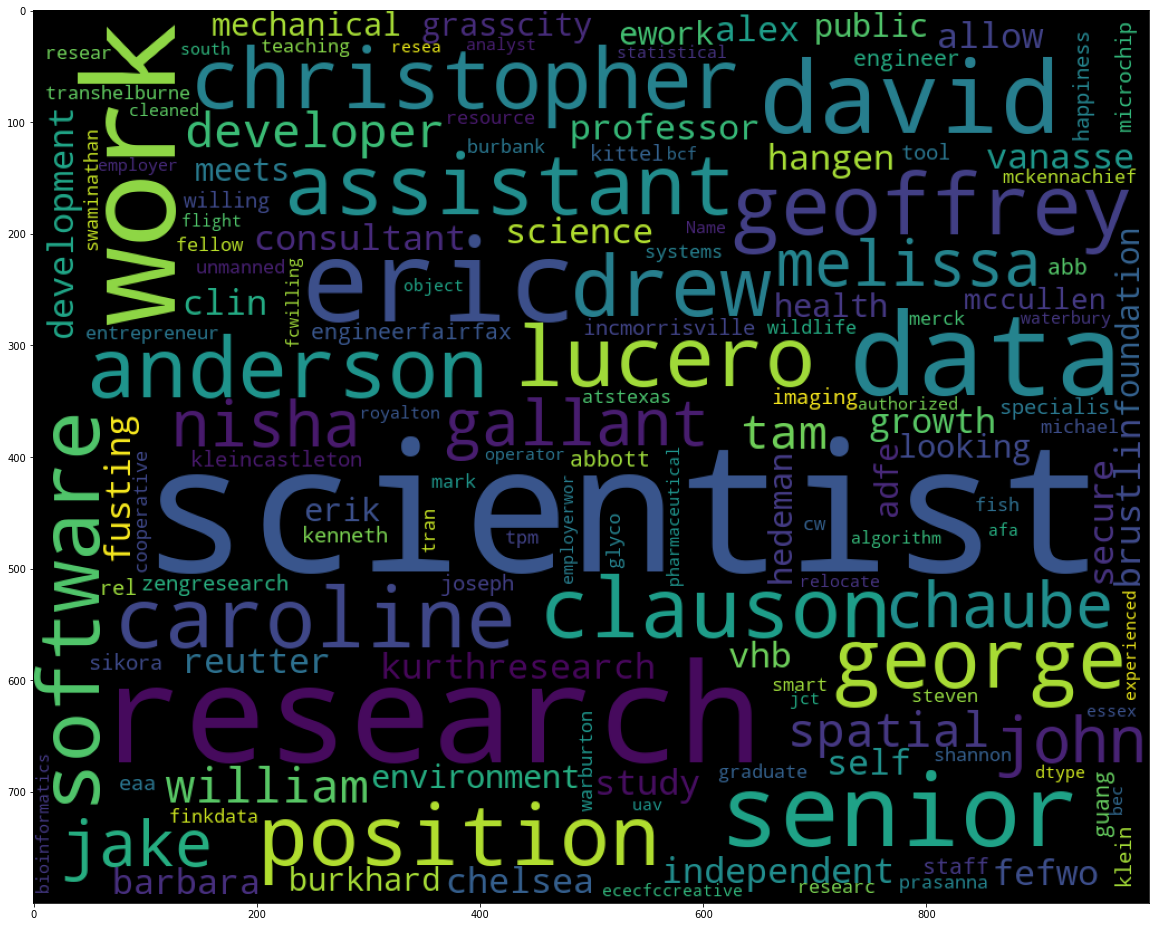

In [ ]:
# plot the word cloud for text that is flagged
plt.figure(figsize = (20,20)) 
wc=WordCloud(max_words=2000, width=1000 , height=800, stopwords=stop_words).generate(str(resume_df[resume_df['class']==1].cleaned))
plt.imshow(wc)


# - Plot the wordcloud for class #0

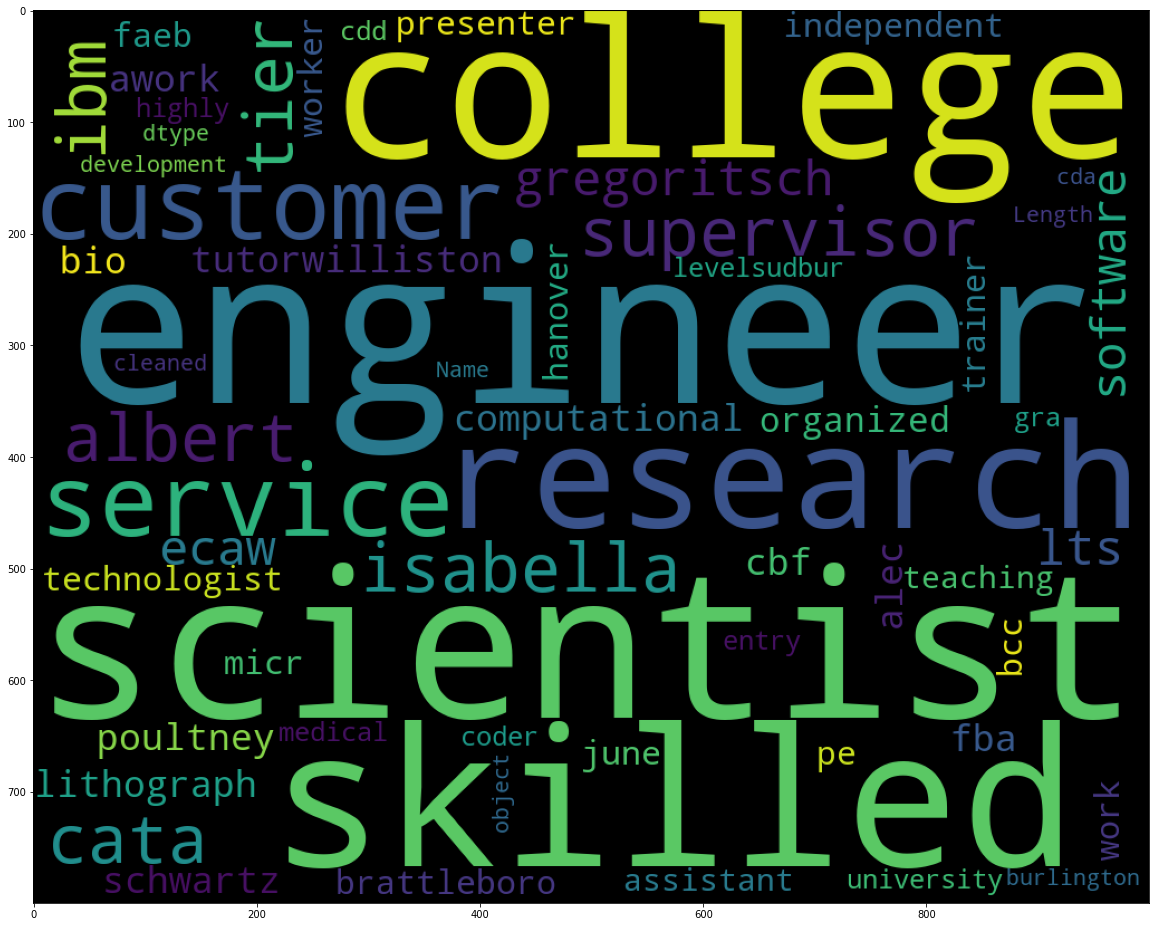

In [ ]:
plt.figure(figsize = (20,20)) 
wc1=WordCloud(max_words=2000, width=1000 , height=800, stopwords=stop_words).generate(str(resume_df[resume_df['class']==0].cleaned))
plt.imshow(wc1)

#  PREPARE THE DATA BY APPLYING COUNT VECTORIZER

In [ ]:
# CountVectorizer example
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first document.','This document is the second document.','And this is the third one.','Is this the first document?']
vectorizer=CountVectorizer()
x=vectorizer.fit_transform(sample_data)


In [ ]:
print(vectorizer.get_feature_names())

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']


In [ ]:
print(x.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


In [ ]:
# Applying CountVectorier to the cleaned text
vectorizer=CountVectorizer()
CountVectorizer=vectorizer.fit_transform(resume_df['cleaned'])

In [ ]:
print(vectorizer.get_feature_names())

['aaalac', 'aabb', 'aac', 'aacn', 'aacr', 'aacrjournals', 'aakeroõ_y', 'aanpcp', 'aaron', 'abbott', 'abdomen', 'abdominal', 'abdul', 'aberdeen', 'abi', 'abilities', 'ability', 'abiotic', 'able', 'abnormal', 'aboard', 'abosalem', 'abraham', 'abreast', 'abs', 'absence', 'absorbance', 'abstract', 'abstracta', 'abstractdisease', 'abstracted', 'abstractin', 'abstracts', 'abualrub', 'abundance', 'abureehan', 'abuse', 'abusiness', 'academia', 'academic', 'academics', 'academy', 'acaeefbc', 'accelerated', 'accept', 'acceptability', 'acceptable', 'acceptance', 'accepted', 'accepting', 'access', 'accessibility', 'accessible', 'accession', 'accident', 'accidents', 'accolateî', 'accommodations', 'accomplished', 'accomplishment', 'accomplishments', 'accord', 'accordance', 'according', 'accordingly', 'accords', 'account', 'accountability', 'accountable', 'accounted', 'accounting', 'accounts', 'accreditation', 'accredited', 'accrual', 'accumulation', 'accuracy', 'accurate', 'accurately', 'accustomed'

In [ ]:
print(CountVectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


#  TRAIN NAIVE BAYES CLASSIFIER MODEL

In [ ]:
x = CountVectorizer

In [ ]:
y=resume_df["class"]

In [ ]:
x.shape

(125, 11316)

In [ ]:
y.shape

(125,)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier=MultinomialNB()
NB_classifier.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
x_train.shape

(100, 11316)

# ASSESS TRAINED MODEL PERFORMANCE


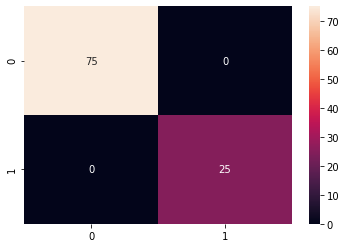

In [ ]:
# Predicting the performance on train data
y_predict_train = NB_classifier.predict(x_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot = True)

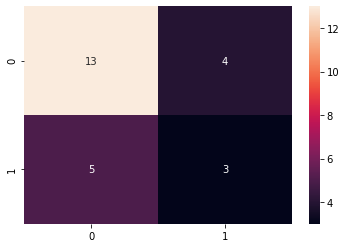

In [ ]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(x_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot = True)

In [ ]:
# classification report
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.72      0.76      0.74        17
           1       0.43      0.38      0.40         8

    accuracy                           0.64        25
   macro avg       0.58      0.57      0.57        25
weighted avg       0.63      0.64      0.63        25



# Random Forest 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
clf_rf=RandomForestClassifier(n_estimators=200)

clf_rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_predict_rf=clf_rf.predict(x_test)

In [ ]:
print('Accuracy of RandomForest Classifier: {:.2f}'.format(accuracy_score(y_test,y_predict_rf)))

Accuracy of RandomForest Classifier: 0.68


# GridSearch RandomForest

In [ ]:
param_grid_rf = {"n_estimators": np.arange(2, 300, 2)}

In [ ]:
grid_rf_acc = GridSearchCV(clf_rf, param_grid_rf)
grid_rf_acc.fit(x_train, y_train)

#Predict values based on new parameters
y_pred_rf_acc = grid_rf_acc.predict(x_test)

# New Model Evaluation metrics 
print('Accuracy Score : ', accuracy_score(y_test,y_pred_rf_acc))

Accuracy Score :  0.64


In [ ]:
grid_rf_acc.best_params_

{'n_estimators': 20}

# Logestic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log = LogisticRegression()
log.fit(x_train,y_train)
y_pred_log = log.predict(x_test)

In [ ]:
print('Accuracy of Logistic Classifier: {:.2f}'.format(accuracy_score(y_test,y_pred_log)))

Accuracy of Logistic Classifier: 0.84


# GridSearch Log

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [ ]:
log = LogisticRegression()
grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,0.01,1,5,10,25]}
grid_log_acc = GridSearchCV(log, param_grid = grid_values)
grid_log_acc.fit(x_train, y_train)

In [ ]:
#Predict values based on new parameters
y_pred_log_acc = grid_log_acc.predict(x_test)

# New Model Evaluation metrics 
print('Accuracy Score : ' , accuracy_score(y_test,y_pred_log_acc))

Accuracy Score :  0.84


# SVC 

In [ ]:
from sklearn import svm
from sklearn.svm import SVC

In [ ]:
classifier = SVC()
classifier.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred_svc = classifier.predict(x_test)
print('Accuracy of SVC Classifier: {:.2f}'.format(accuracy_score(y_test,y_pred_svc)))

Accuracy of SVC Classifier: 0.68


# GridSearch SVC

In [ ]:
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001],'kernel':['rbf','linear']}

In [ ]:
grid_svc_acc = GridSearchCV(classifier, param_grid)
grid_svc_acc.fit(x_train, y_train)

#Predict values based on new parameters
y_pred_svc_acc = grid_svc_acc.predict(x_test)

# New Model Evaluation metrics 
print('Accuracy Score : ' , accuracy_score(y_test,y_pred_svc_acc))

Accuracy Score :  0.84


In [ ]:
grid_svc_acc.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}

# Testing 

In [ ]:
text ="Independent Consultant - Self-employed Burlington VT - Email me on Indeed: indeed.com/r/Alex-Reutter/2c4a904a891a6fef WORK EXPERIENCE Independent Consultant Self-employed - Burlington VT - October 2016 to Present Projects in progress. Senior Data Scientist IBM - 2015 to 2016 Developed product strategies for Data Science Experience (datascience.ibm.com) for machine learning algorithms and end-to- end usage for data scientists. Patient Zero for ensuring product design matches typical data scientist workflows. ��� Enabled connection with tens-of-thousands of customers onsite and in social media impressions by crafting story of data scientist in auto industry and how use of SPSS and Spark evolved from analysis of spreadsheet data on defect rates of auto parts to integration of PySpark into analytic work streams. Story was featured at 2015 Spark Signature Moment in IBM Speaker Presenter IBM - 2013 to 2015 and in customer-facing videos and presentations. ��� Increased sales by evangelizing IBM analytics solutions to hundreds of customers onsite as Speaker Presenter at IBM Insight 2013 - 2015. ��� Improved development of new product features including Data Science Experience (DSX) Watson Analytics SPSS Advisory Software Engineer (Data Scientist) IBM - 2009 to 2015 Led team as Agile product owner for Analytic Server working with offering management and internal and external clients to coordinate and prioritize the development of new software features. ��� Facilitated quarterly (rather than yearly) release cycles and single integrated system for project tracking by transitioning 100+ developers from Waterfalls to Agile development processes as project focal. ��� Aided transformation of integrated supply chain (ISC) code base from R to more-easily maintainable SPSS by mentoring colleague on SPSS products from model prototyping to advanced forecasting techniques. Success story of collaboration between software group and ISC was presented to IBM analytics and inspired further internal partnerships. ��� Delivered Analytic Server 1.0 - 2.1 product by keeping development focused on important stories designing and implementing scripts to track sprint progress and analyze product backlog culling dead work items and celebrating successes. R. ALEXANDER (ALEX) REUTTER alex.reutter@gmail.com Master Statistical Writer SPSS INC - 2006 to 2009 Authored and contributed to designs integration standards and user-facing documentation of common statistical components across SPSS products. ��� Gave customers access to item response models otherwise unavailable in SPSS Statistics product by creating custom commands and dialogs using open source Python and R programmability. ��� Ensured quality and consistency of thousands of pages of documentation training and sales and marketing presentations by writing cross-product standards for developing examples and sample data that prove product functionality. ��� Reduced time to create command syntax documentation 80% and ensured designs / documentation were in sync by writing standards for single-sourcing command syntax designs and user-facing documentation. Senior Statistical Writer SPSS INC - 1998 to 2006 Gave customers access to 1K+ pages of algorithms documentation in easily accessible online Help and PDF format by leading project to convert from assorted collection of MS Word documents to single-sourced XML. Research Assistant to Dr. Giovanni Parmigiani DUKE UNIVERSITY - Durham NC - 1997 to 1998 Designed hierarchical models / wrote programs in R for Center for Health Policy Research. Identified defects in algorithms and underlying assumptions of Stroke Policy Model leading to creation of web portal that allowed practicing physicians to more easily assess effects of potential treatment strategies utilizing model. EDUCATION Master of Science in Statistics and Decision Sciences Duke University - Durham NC 1998 Baccalaureate in (AB) Mathematics Princeton University - Princeton NJ 1994 MSc in General Strategies for Assessing Convergence of MCMC"

In [ ]:
text = preprocess(text)
print(text)

ndependent consultant self employed burlington alex reutter fef work experience independent consultant self employed burlington october present projects progress senior data scientist ibm developed product strategies data science experience datascience ibm machine learning algorithms end end usage data scientists patient zero ensuring product design matches typical data scientist workflows enabled connection tens thousands customers onsite social media impressions crafting story data scientist auto industry use spss spark evolved analysis spreadsheet data defect rates auto parts integration pyspark analytic work streams story featured spark signature moment ibm speaker presenter ibm customer facing videos presentations increased sales evangelizing ibm analytics solutions hundreds customers onsite speaker presenter ibm insight improved development new product features including data science experience dsx watson analytics spss advisory software engineer data scientist ibm led team agile

In [ ]:
Vec=vectorizer.transform([text])

In [ ]:
predict = grid_svc_acc.predict(Vec)
predict

array([1])

In [ ]:
text1='Customer Service Supervisor/Tier - Isabella Catalog Company South Burlington VT - Email me on Indeed: indeed.com/r//49f8c9aecf490d26 WORK EXPERIENCE Customer Service Supervisor/Tier Isabella Catalog Company - Shelburne VT - August 2015 to Present 2 Customer Service/Visual Set Up & Display/Website Maintenance ��� Supervise customer service team of a popular catalog company ��� Manage day to day issues and resolution of customer upset to ensure customer satisfaction ��� Troubleshoot order and shipping issues: lost in transit order errors damages ��� Manage and resolve escalated customer calls to ensure customer satisfaction ��� Assist customers with order placing cross-selling/upselling of catalog merchandise ��� Set up and display of sample merchandise in catalog library as well as customer pick-up area of the facility ��� Website clean-up: adding images type up product information proofreading Administrative Assistant /Events Coordinator/Office Services Assistant Eileen Fisher Inc - Irvington NY - February 2014 to July 2015 Support to Director of Architecture and Architecture Coordinator in all daily activities including: preparing monthly expense reports scheduling calendar maintenance arranging all aspects of travel/logistics catering interior design research projects ��� Manage event set ups through entire process for two Eileen Fisher corporate locations ��� Catering overseeing set up walk-thru of space with client review event forms with facilities team ��� Daily management of two professional calendars that require heavy scheduling ��� Office services that include: companywide room reservations office supply orders ��� Filtered calls to the Chief Creative Officer/Owner of the company Temp Assignment OrthoNet - White Plains NY - December 2013 to February 2014 Office Services Assistant/Receptionist ��� Managed heavy call volume for orthopedic specialty benefit management company ��� Directed heavy daily incoming mail flow ��� Processed daily checks and entered data into Excel to generate totals for accounting reports Executive Personal Assistant Westchester NY - January 2012 to December 2013 Home Office Assistant/ Personal Assistant ��� Provided professional office support to three established Psychologists in the New York area ��� Carefully handled personal and confidential patient information ��� Organized uncluttered and simplified office space to create a more user-friendly atmosphere ��� Coordinated and researched all travel related details (flights hotels visas cars etc.) ��� Managed personal errands phone calls and emails. ��� Responsible for mail processing and bank deposits while Psychologists were traveling Customer Service Representative/ Account Manager CM Almy & Sons Inc - Greenwich CT - January 2007 to January 2012 Greenwich CT January 2007 - January 2012 Customer Service Representative/ Account Manager ��� Provided a high level of customer service to clergy and church members of all denominations ��� Answered heavy call volume and assisted customers in a highly efficient manor ��� Assisted customers with overall design of garments final decision making of church item purchases ��� Managed and maintained a large account database with daily phone calls to customer accounts ��� Responsible for tracking large shipments and also replacement of lost or damaged items 435 Dorset Street * South Burlington VT 05403 ��_ 914.564.4381 ��_ Aimeerblair319@gmail.com Administrative Assistant to Chief Financial Officer Coalition to Salute Americas Heroes - Ossining NY - January 2005 to January 2007 Ossining NY January 2005 - January 2007 Administrative Assistant to Chief Financial Officer ��� Interviewed military veterans and their families to be considered for financial aid ��� Reviewed a highly confidential database for candidate ��� Mediated discussions between military veterans and collectors ��� Arrange final payouts for debt incurred during time of injury ��� Finalized paperwork for award payouts ��� Coordinated travel and logistics for large sponsored events ��� Assisted disabled veterans during events ��� Provided basic administrative support Administrative Assistant to Sales Team/ Trade Show Coordinator Leo Electron Microscopy - Thornwood NY - May 2000 to August 2003 Thornwood NY May 2000 - August 2003 Administrative Assistant to Sales Team/ Trade Show Coordinator ��� Communicated general information and provided quotes to high end buyers ��� Worked closely with a team of sales associates arranging meetings with potential buyers ��� Prepared final proposals and closing sale information on purchased electron microscopes ��� Arranged all aspects of travel and logistics for trade shows within the United States and Canada. ��� Attended trade shows with sales associates and scientists to insure all electron microscopes arrived safely for set up ��� Assisted with demonstrations and close of sales on trade show floor Artist Charles Fazzino 3D Pop Artist Charles Fazzino - New Rochelle NY - 1993 to 1996 and 2003-2005 Freelance Artist ��� Assembled 3 dimensional piece-art on a weekly basis from home office ��� Responsible for detailed finishing work and making pieces presentable for purchase in galleries world-wide EDUCATION AAS in Visual Arts Westchester Community College - New York NY School knowledge ADDITIONAL INFORMATION Providing more than 15 years of combined office services with a focus on Administrative Assistance Customer Service Event Coordination Trade Show Coordination and Facilitating'

In [ ]:
text1 = preprocess(text1)
print(text1)

customer service supervisor tier isabella catalog company south burlington aecf work experience customer service supervisor tier isabella catalog company shelburne august present customer service visual set display website maintenance supervise customer service team popular catalog company manage day day issues resolution customer upset ensure customer satisfaction troubleshoot order shipping issues lost transit order errors damages manage resolve escalated customer calls ensure customer satisfaction assist customers order placing cross selling upselling catalog merchandise set display sample merchandise catalog library customer pick area facility website clean adding images type product information proofreading administrative assistant events coordinator office services assistant eileen fisher irvington february july support director architecture architecture coordinator daily activities including preparing monthly expense reports scheduling calendar maintenance arranging aspects trav

In [ ]:
Vec1=vectorizer.transform([text1])

In [ ]:
predict1 = grid_svc_acc.predict(Vec1)
predict1

array([0])